# Assignment 4 Exercises 9.1, 10.1, 11.1
Aaron Ou | 2018-04-23

In [1]:
rm(list = ls())
cat('\014') # clear console = Ctrl + L
library(ggplot2, verbose=FALSE, warn.conflicts = FALSE, quietly = TRUE)
library(dplyr, verbose=FALSE, warn.conflicts = FALSE, quietly = TRUE)
library(class) # knn()
library(repr)
library(grid)　# used to define multiplot()

In [2]:
# Set plot size
options(repr.plot.width = 9, repr.plot.height = 3)

### 9.1:

<!--Run KNN on the dataset using 3 different values for K. Compute the success rate and profits for each
approach. Discuss your results.
Margin per success = 1800; Sale cost per target = 180
-->

In [3]:
# Read the data. di refers to data of insurance
di <- read.csv("../Data/AutoInsurance.csv", header = TRUE)

# Basic summary
# names(di)
nrow(di)
summary(di$Purchase)

# % of Yes (basis of random guess)
348/(5474 + 348)

[1] 5822

No  Yes 
5474  348

[1] 0.05977327

In [4]:
# Scale the data
di_x <- di %>% select(-Purchase) %>% scale

# 20% as test dataset, roughly 1000 out of 5800
test_rows <- 1:1000
test_x <- di_x[test_rows, ]
test_y <- di[test_rows, "Purchase"]

# 80% as training data set
train_x <- di_x[-test_rows, ]
train_y <- di[-test_rows, "Purchase"]

In [5]:
# Fit the model on training dataset
set.seed(1)


ks <- c(1:15)
result <- list()
for (i in ks) {
  k <- ks[i]  
  test_pred <- knn(train = train_x, test = test_x, cl = train_y, k = k)
  # Test the model's fit on test dataset
  # Error rate, a.k.a Misclassification rate. e: error rate; s: success rate (Accuracy) = 1 - error rate
  e1 <- round(mean(test_y != test_pred), 3)
  accuracy <- 1 - e1

  # Confusion matrix to calculate True Positive Rates, defined as Sucess Rate in our case
  # The success rate of predicting Yes
  dt <- data.frame(test_pred, test_y)
  both_yes <- nrow(filter(dt, test_pred == "Yes", test_y == "Yes"))
  pred_yes <- nrow(filter(dt, test_pred == "Yes"))
  actual_yes <- nrow(filter(dt, test_y == "Yes"))
  success_rate <- ifelse(both_yes == 0 & pred_yes == 0, 0,
                    ifelse(both_yes == 0, 0,
                       round(both_yes / pred_yes, 3)))
  profit <- both_yes * 1800 - pred_yes * 180
  result0 <- data.frame(k = k, accuracy, success_rate, pred_yes, profit)  
  if(i == 1) result <- result0 else result <- rbind(result, result0)
}

result

k,accuracy,success_rate,pred_yes,profit
1,0.882,0.117,77,2340
2,0.891,0.097,62,-360
3,0.927,0.208,24,4680
4,0.930,0.238,21,5220
5,0.934,0.267,15,4500
6,0.938,0.364,11,5220
7,0.938,0.286,7,2340
8,0.939,0.333,6,2520
9,0.942,1.000,1,1620
10,0.941,0.000,0,0


In [6]:
# Scale profit to 0-1
result$profit2 <- round(result$profit/max(result$profit, na.rm = T), 3)
# Create max_profit data frame to plot vertical line later
max_profit <- result[result$profit2 == 1, ]

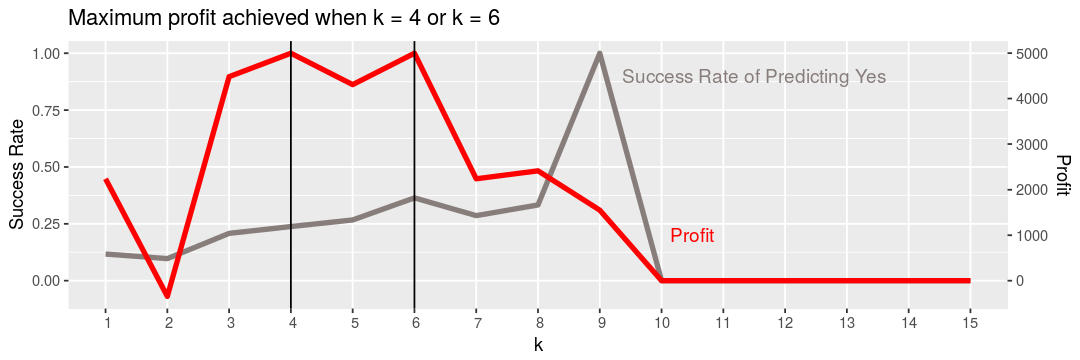

In [7]:
# Plot
ggplot(result, aes(x = k)) +
  geom_line(aes(y = success_rate), color = "#877d7b", size = 1.5) +
  geom_line(aes(y = profit2), color = "red", size = 1.5) +
  geom_vline(xintercept = max_profit$k, color = "black") +
  ylab("Success Rate") +
  scale_y_continuous(sec.axis = sec_axis(trans = ~.*5000, name = "Profit")) +
  scale_x_discrete(limits = ks) +
  annotate("text", label = "Success Rate of Predicting Yes", x = 11.5, y = 0.9, size = 4, colour = "#877d7b") +
  annotate("text", label = "Profit", x = 10.5, y = 0.2, size = 4, colour = "red") +
  ggtitle("Maximum profit achieved when k = 4 or k = 6")

In [8]:
max_profit

,k,accuracy,success_rate,pred_yes,profit,profit2
4,4,0.930,0.238,21,5220,1
6,6,0.938,0.364,11,5220,1


**Note**
- Those predicted Yes are sales target.　When sale target actually buys, it is Actual Yes, bringing a margin of 1800. Each sale effort costs 180.
- Profit = Margin × Actual Yes - Cost × Predict Yes

**Interpretation**
- As **k** increases from 1 to 9, the **Success Rate of Predicting Yes** increases accordingly till it reaches maximum when k = 9. Starting from k = 10 onwards, KNN model does not predict any Yes, basically discourage any sales efforts.
- As **k** increases, profit sees ups and downs. Profit reaches maximum when k = 4 or k = 6. Between the two, when k = 6, **pred_yes** is smaller, which suggests less sale efforts.

Therefore, **the optimal k value is 6**, where maximum profit is gained (5220) with least sales efforts (11).

### 10.1:

<!--
...
-->